In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Data/Train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,1601,G6,S
freq,577,7,4,644


In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
def value_counts_graphs(column_name):
    label_freq = df[column_name].value_counts() / len(df)
    plotting = label_freq.sort_values(ascending=False).plot.bar()
    return label_freq, plotting 

(0    0.616162
 1    0.383838
 Name: Survived, dtype: float64,
 <AxesSubplot:>)

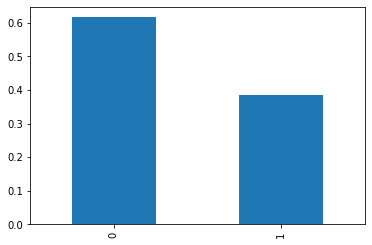

In [12]:
value_counts_graphs('Survived')

(3    0.551066
 1    0.242424
 2    0.206510
 Name: Pclass, dtype: float64,
 <AxesSubplot:>)

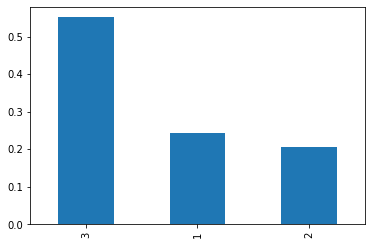

In [13]:
value_counts_graphs('Pclass')

(male      0.647587
 female    0.352413
 Name: Sex, dtype: float64,
 <AxesSubplot:>)

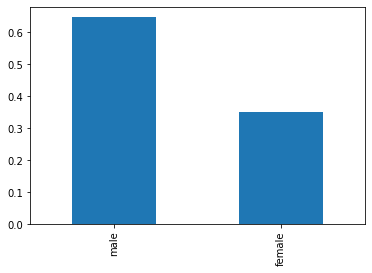

In [14]:
value_counts_graphs('Sex')

(24.00    0.033670
 22.00    0.030303
 18.00    0.029181
 28.00    0.028058
 19.00    0.028058
            ...   
 55.50    0.001122
 74.00    0.001122
 0.92     0.001122
 70.50    0.001122
 12.00    0.001122
 Name: Age, Length: 88, dtype: float64,
 <AxesSubplot:>)

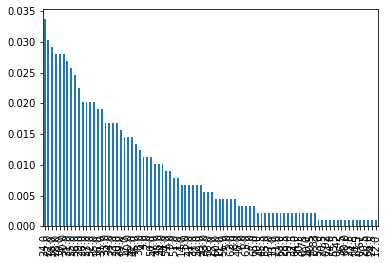

In [15]:
value_counts_graphs('Age')

(0    0.682379
 1    0.234568
 2    0.031425
 4    0.020202
 3    0.017957
 8    0.007856
 5    0.005612
 Name: SibSp, dtype: float64,
 <AxesSubplot:>)

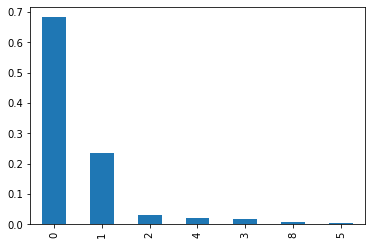

In [16]:
value_counts_graphs('SibSp')

In [17]:
def groupby_var_target(df, column_name, target_name, title):
    ## group by
    groupby_var_target = df.groupby(
        column_name
    )[target_name].sum() / df.groupby(
        column_name
    )[target_name].count() * 100.0
    
    ## plot groupby
    ax = groupby_var_target.sort_values(ascending=False).plot(
        kind='bar',
        color='skyblue',
        grid=True,
        figsize=(10, 7),
        title=title
    )
    
    return groupby_var_target, plt.show()

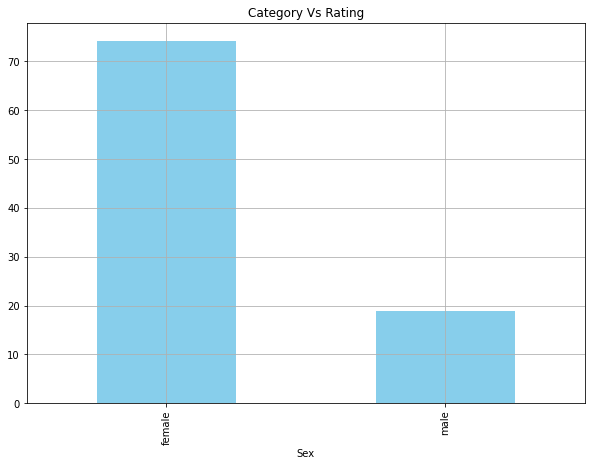

(Sex
 female    74.203822
 male      18.890815
 Name: Survived, dtype: float64,
 None)

In [18]:
groupby_var_target(df, 'Sex', 'Survived', 'Category Vs Rating')

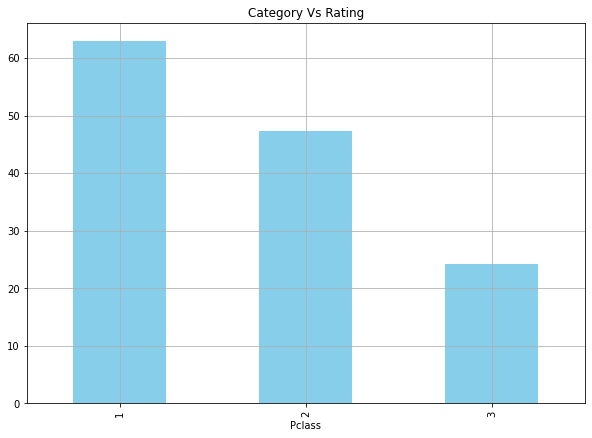

(Pclass
 1    62.962963
 2    47.282609
 3    24.236253
 Name: Survived, dtype: float64,
 None)

In [19]:
groupby_var_target(df, 'Pclass', 'Survived', 'Category Vs Rating')

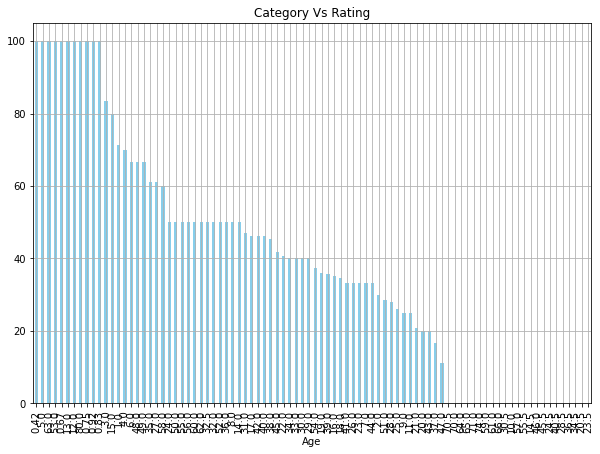

(Age
 0.42     100.0
 0.67     100.0
 0.75     100.0
 0.83     100.0
 0.92     100.0
          ...  
 70.00      0.0
 70.50      0.0
 71.00      0.0
 74.00      0.0
 80.00    100.0
 Name: Survived, Length: 88, dtype: float64,
 None)

In [20]:
groupby_var_target(df, 'Age', 'Survived', 'Category Vs Rating')

In [21]:
df['Age_group'] = df['Age'].apply(
    lambda x: '[0, 20)' if x < 20 else '[20, 40)' if x < 40 \
        else '[40, 60)' if x < 60  \
        else '[60+)' if x >= 60 \
        else np.nan
)

In [22]:
df['Fare_group'] = df['Fare'].apply(
    lambda x: '[0, 7.9)' if x < 7.9 else '[7.9, 14.4)' if x < 14.4 \
        else '[31, 38.9)' if x < 38.9  \
        else '[38.9+)' if x >= 38.9 \
        else np.nan
)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[20, 40)","[0, 7.9)"
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"[20, 40)",[38.9+)
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[20, 40)","[7.9, 14.4)"
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,"[20, 40)",[38.9+)
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"[20, 40)","[7.9, 14.4)"


In [24]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

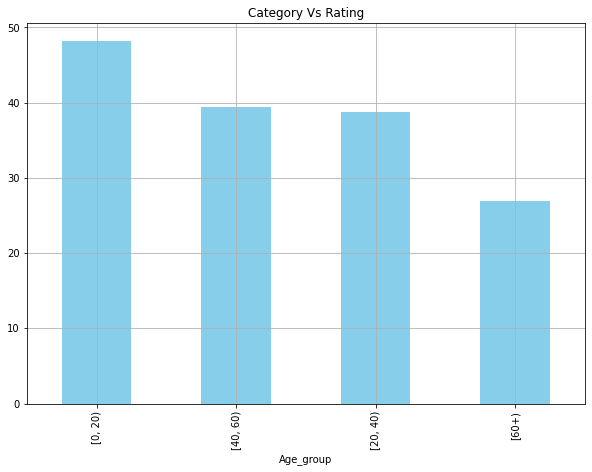

(Age_group
 [0, 20)     48.170732
 [20, 40)    38.759690
 [40, 60)    39.416058
 [60+)       26.923077
 Name: Survived, dtype: float64,
 None)

In [25]:
groupby_var_target(df, 'Age_group', 'Survived', 'Category Vs Rating')

In [26]:
def groupby_2_cols_against_target(df, column1, column2, target):

    groupby_2_cols_against_target = df.groupby(
        [column1, column2]
    )[target].sum() / df.groupby(
        [column1, column2]
    )[target].count() * 100.0

    pivot_t = groupby_2_cols_against_target.reset_index().pivot(
        index=column1,
        columns=column2,
        values=target
    )
    
    return pivot_t

In [27]:
groupby_2_cols_against_target(df, "Pclass", "Sex", "Survived")

Sex,female,male
Pclass,,
1,96.808511,36.885246
2,92.105263,15.740741
3,50.000000,13.544669


<AxesSubplot:>

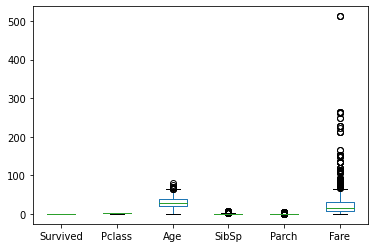

In [28]:
df.plot.box()

<AxesSubplot:>

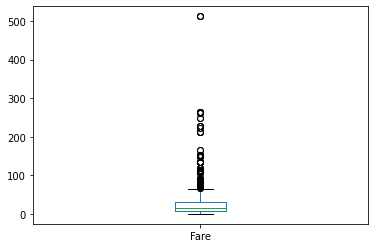

In [29]:
df['Fare'].plot.box()

<AxesSubplot:>

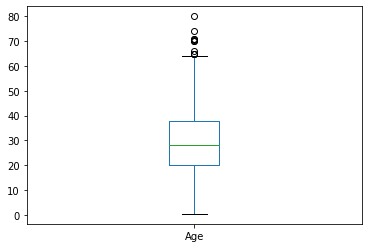

In [30]:
df['Age'].plot.box()

<AxesSubplot:>

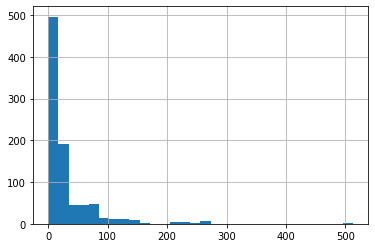

In [31]:
df['Fare'].hist(bins=30)

<AxesSubplot:>

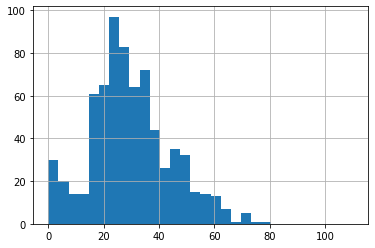

In [32]:
df['Age'].hist(bins=30, range=(0, 110))

In [33]:
def graph_outliers(column_names):
    for column_name in column_names:
        plt.figure(figsize=(3,6))
        sns.boxplot(y=df[column_name])

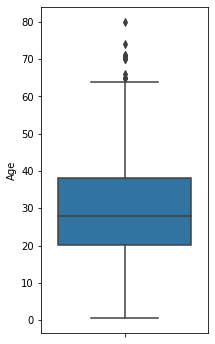

In [34]:
graph_outliers(['Age'])

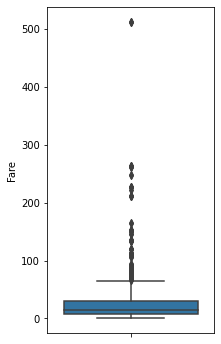

In [35]:
graph_outliers(['Fare'])

c:\users\zebas\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

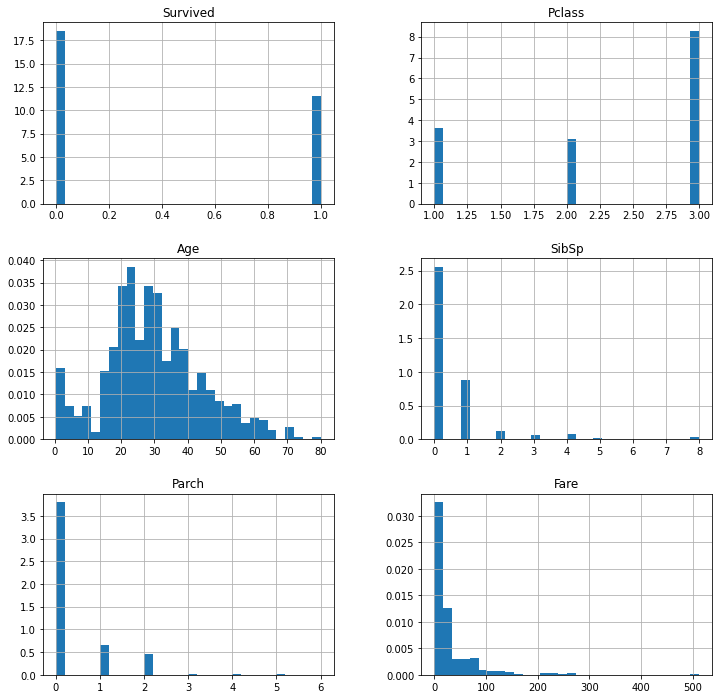

In [36]:
df.hist(bins=30, figsize=(12,12), density=True)

In [37]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


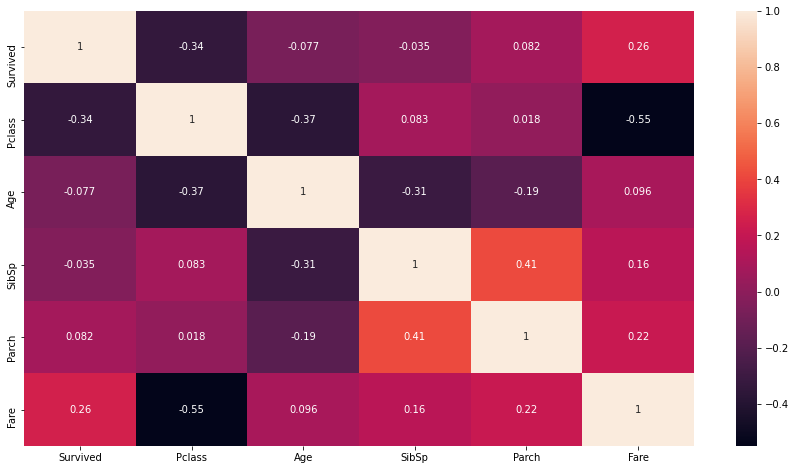

In [38]:
corr = df.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

corr

In [39]:
def scatter_plot_target(column_names, target):
    for column_name in column_names:
        plt.scatter(df[column_name], df[target])
        plt.show()

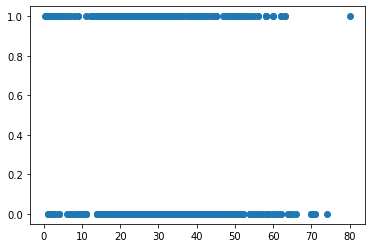

In [40]:
scatter_plot_target(['Age'], 'Survived')

In [41]:
df.to_csv('Data/TrainDataAnalysis.csv', index=False)